In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-lzywle9f
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-lzywle9f


In [ ]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
dataset = pd.read_excel('/content/aus_weather_train.csv')
dataset.head(1)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,124741.0,2011-08-07,SalmonGums,3.2,19.0,0.0,NE,31.0,N,NE,...,60.0,34.0,1017.64994,1015.255889,4.447461,4.50993,10.4,18.6,0.0,1.0


In [ ]:
dataset.columns

Index(['Id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
dataset.isna().sum()

Id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["Location"] = label_encoder.fit_transform(dataset["Location"])
dataset["WindDir9am"] = label_encoder.fit_transform(dataset["WindDir9am"])
dataset["WindGustDir"] = label_encoder.fit_transform(dataset["WindGustDir"])
dataset["WindDir3pm"] = label_encoder.fit_transform(dataset["WindDir3pm"])


In [ ]:
dataset.head(1)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,124741.0,2011-08-07,36,3.2,19.0,0.0,4,31.0,3,4,...,60.0,34.0,1017.64994,1015.255889,4.447461,4.50993,10.4,18.6,0.0,1.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51003 entries, 0 to 51002
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             51003 non-null  float64       
 1   Date           51003 non-null  datetime64[ns]
 2   Location       51003 non-null  int64         
 3   MinTemp        51003 non-null  float64       
 4   MaxTemp        51003 non-null  float64       
 5   Rainfall       51003 non-null  float64       
 6   WindGustDir    51003 non-null  int64         
 7   WindGustSpeed  51003 non-null  float64       
 8   WindDir9am     51003 non-null  int64         
 9   WindDir3pm     51003 non-null  int64         
 10  WindSpeed9am   51003 non-null  float64       
 11  WindSpeed3pm   51003 non-null  float64       
 12  Humidity9am    51003 non-null  float64       
 13  Humidity3pm    51003 non-null  float64       
 14  Pressure9am    51003 non-null  float64       
 15  Pressure3pm    5100

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
train_dataset.drop('Date', axis = 1,inplace =True)

In [ ]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset.drop('Date',axis = 1, inplace =True)

In [ ]:
train_labels = train_dataset.pop('RainTomorrow')

In [ ]:
test_labels = test_dataset.pop('RainTomorrow')

In [ ]:
def deep_nn():
    model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_dataset.keys())]),
                          
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          
                          layers.Dense(1,activation='sigmoid')])
    return model

In [ ]:
# define model
model = deep_nn()

# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# print model information
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 256)               5376      
                                                                 
 dense_126 (Dense)           (None, 256)               65792     
                                                                 
 dense_127 (Dense)           (None, 256)               65792     
                                                                 
 dense_128 (Dense)           (None, 256)               65792     
                                                                 
 dense_129 (Dense)           (None, 1)                 257       
                                                                 
Total params: 203,009
Trainable params: 203,009
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
start = time.time()
model_info = model.fit(train_dataset, train_labels, batch_size=32, \
                       epochs=100, verbose=2, validation_split=0.2)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/100
1021/1021 - 5s - loss: 1.2902 - accuracy: 0.5011 - val_loss: 1.2738 - val_accuracy: 0.5014 - 5s/epoch - 5ms/step
Epoch 2/100
1021/1021 - 4s - loss: 1.2585 - accuracy: 0.5011 - val_loss: 1.2428 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step
Epoch 3/100
1021/1021 - 4s - loss: 1.2281 - accuracy: 0.5011 - val_loss: 1.2130 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step
Epoch 4/100
1021/1021 - 4s - loss: 1.1990 - accuracy: 0.5011 - val_loss: 1.1844 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step
Epoch 5/100
1021/1021 - 4s - loss: 1.1710 - accuracy: 0.5011 - val_loss: 1.1570 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step
Epoch 6/100
1021/1021 - 4s - loss: 1.1441 - accuracy: 0.5011 - val_loss: 1.1306 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step
Epoch 7/100
1021/1021 - 4s - loss: 1.1182 - accuracy: 0.5011 - val_loss: 1.1053 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step
Epoch 8/100
1021/1021 - 4s - loss: 1.0935 - accuracy: 0.5011 - val_loss: 1.0811 - val_accuracy: 0.5014 - 4s/epoch - 4ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


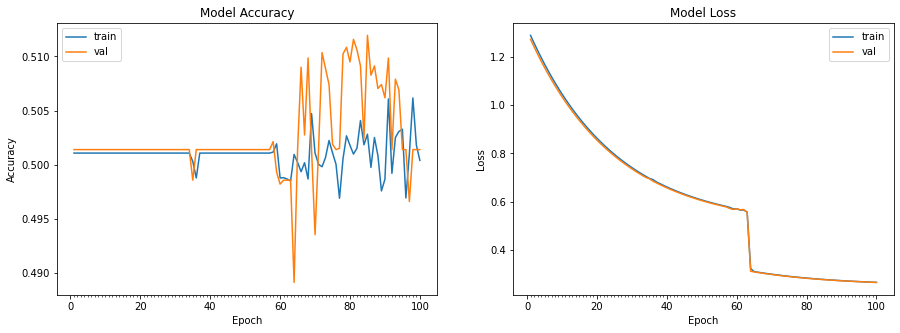

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)